# Computer Vision Homework 1 
 
This assignment is due on Jul 13, at 11:59 PM EST.  
Finish the following programming problems and submit your scripts to BBLearn. You can zip all the data and files for 
submission.  
Install the Python packages needed by 
* pip install -r requirement.txt 
Here are some useful resources: 
* Python  basics  https://pythonbasics.org/ 
* Numpy https://numpy.org/doc/stable/user/basics.html 
* OpenCV  https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html 




## Problem 1 
(4 points) 2D Transformations. 
Create the transform() function in image_transformations.py. The function takes an image,
a 2D transformation 𝑇 , a 3 × 3 matrix, as input, and outputs a transformed image according to the 
transformation 𝑇 . 
After your implementation, run the image_transformations.py in Python to verify it. Figure 1 
shows an example of running the script. 

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
from scipy import ndimage # Roberts Cross Operator


To perform a 2D transformation like rotation, translation, or scaling on an image:
- Get the dimensions of the image using the shape method.
- 2D transformations are represented as 3x3 matr
create coordinate matrices for all pixels




In [3]:
def transform(image, T):
    """
    Apply a 2D transformation to an image using inverse mapping.
    
    Args:
        image: Input image (numpy array)
        T: 3x3 transformation matrix
        
    Returns:
        Transformed image
    """
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Create coordinate matrices for input image corners
    corners = np.array([[0, width-1, width-1, 0],
                       [0, 0, height-1, height-1],
                       [1, 1, 1, 1]])
    
    # Transform corners to find output image bounds
    transformed_corners = T @ corners
    transformed_corners = transformed_corners[:2] / transformed_corners[2]
    
    # Find the bounds of the transformed image
    min_x, max_x = int(np.floor(transformed_corners[0].min())), int(np.ceil(transformed_corners[0].max()))
    min_y, max_y = int(np.floor(transformed_corners[1].min())), int(np.ceil(transformed_corners[1].max()))
    
    # Create output image with appropriate size
    output_width = max_x - min_x + 1
    output_height = max_y - min_y + 1
    
    if len(image.shape) == 3:
        output_image = np.zeros((output_height, output_width, image.shape[2]), dtype=image.dtype)
    else:
        output_image = np.zeros((output_height, output_width), dtype=image.dtype)
    
    # Create coordinate matrices for output image
    x_out, y_out = np.meshgrid(np.arange(min_x, max_x + 1), 
                               np.arange(min_y, max_y + 1))
    
    # Convert to homogeneous coordinates
    coords_out = np.stack([x_out.ravel(), y_out.ravel(), np.ones(x_out.size)])
    
    # Apply inverse transformation to find source coordinates
    T_inv = np.linalg.inv(T)
    coords_src = T_inv @ coords_out
    
    # Convert back to Cartesian coordinates
    x_src = coords_src[0] / coords_src[2]
    y_src = coords_src[1] / coords_src[2]
    
    # Use nearest neighbor interpolation first
    x_src_int = np.round(x_src).astype(int)
    y_src_int = np.round(y_src).astype(int)
    
    # Find valid source coordinates (within input image bounds)
    # Make sure rounded coordinates are still within bounds
    valid_mask = ((x_src_int >= 0) & (x_src_int < width) & 
                  (y_src_int >= 0) & (y_src_int < height))
    
    # Apply the mask to get valid coordinates
    x_src_int = x_src_int[valid_mask]
    y_src_int = y_src_int[valid_mask]
    
    # Get output coordinates
    x_out_valid = x_out.ravel()[valid_mask] - min_x
    y_out_valid = y_out.ravel()[valid_mask] - min_y
    
    # Apply the transformation
    if len(image.shape) == 3:
        for c in range(image.shape[2]):
            output_image[y_out_valid, x_out_valid, c] = image[y_src_int, x_src_int, c]
    else:
        output_image[y_out_valid, x_out_valid] = image[y_src_int, x_src_int]
    
    return output_image

In [4]:
# Load image
image = cv2.imread('pexels-nui-malama-169330637-31188110.jpg')  # Load your image here

# Create Transformation matrices
# Translate by (1000, 2000)
T_translate = np.array([[1, 0, 100], [0, 1, 200], [0, 0, 1]])  

# Rotate by 45 degrees
angle = 45
T_rotate = np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle)), 0],
                     [np.sin(np.radians(angle)), np.cos(np.radians(angle)), 0],
                     [0, 0, 1]])


In [5]:
# Test the transform function with a sample image
translation_result = transform(image, T_translate)
rotation_result = transform(image, T_rotate)




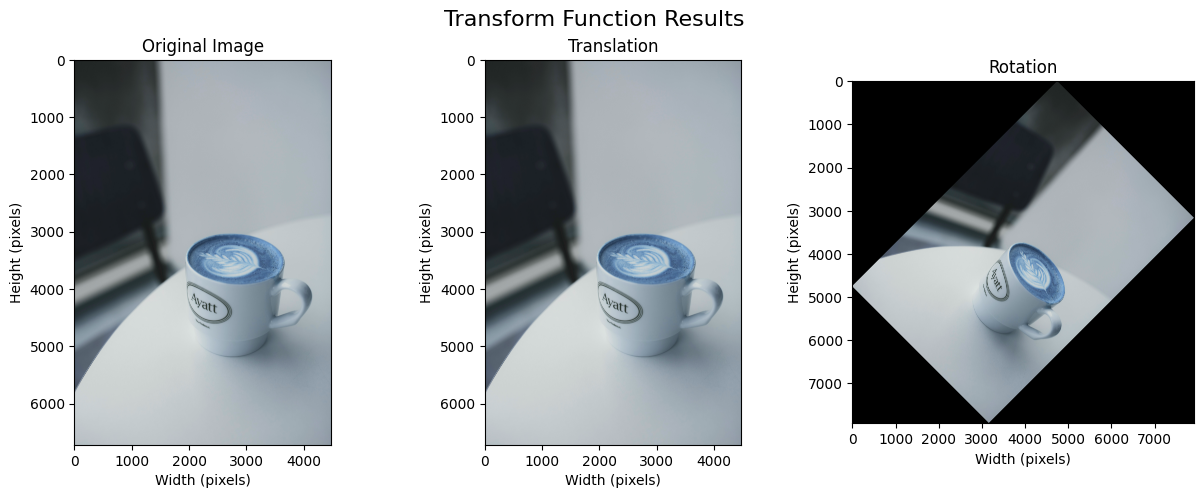

In [6]:
# Display Results

transformation_results = [("Original Image",image),
                          ("Translation", translation_result),
                          ("Rotation", rotation_result)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (title, img) in enumerate(transformation_results):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].set_xlabel("Width (pixels)")
    axes[i].set_ylabel("Height (pixels)")

plt.suptitle("Transform Function Results", fontsize=16)
plt.show()

 
 
Figure 1: Image transformations. 
 
## Problem 2 
 
2.1 Apply these functions on given image  
 
i. Averaging Kernel (3×3and 5×5) 



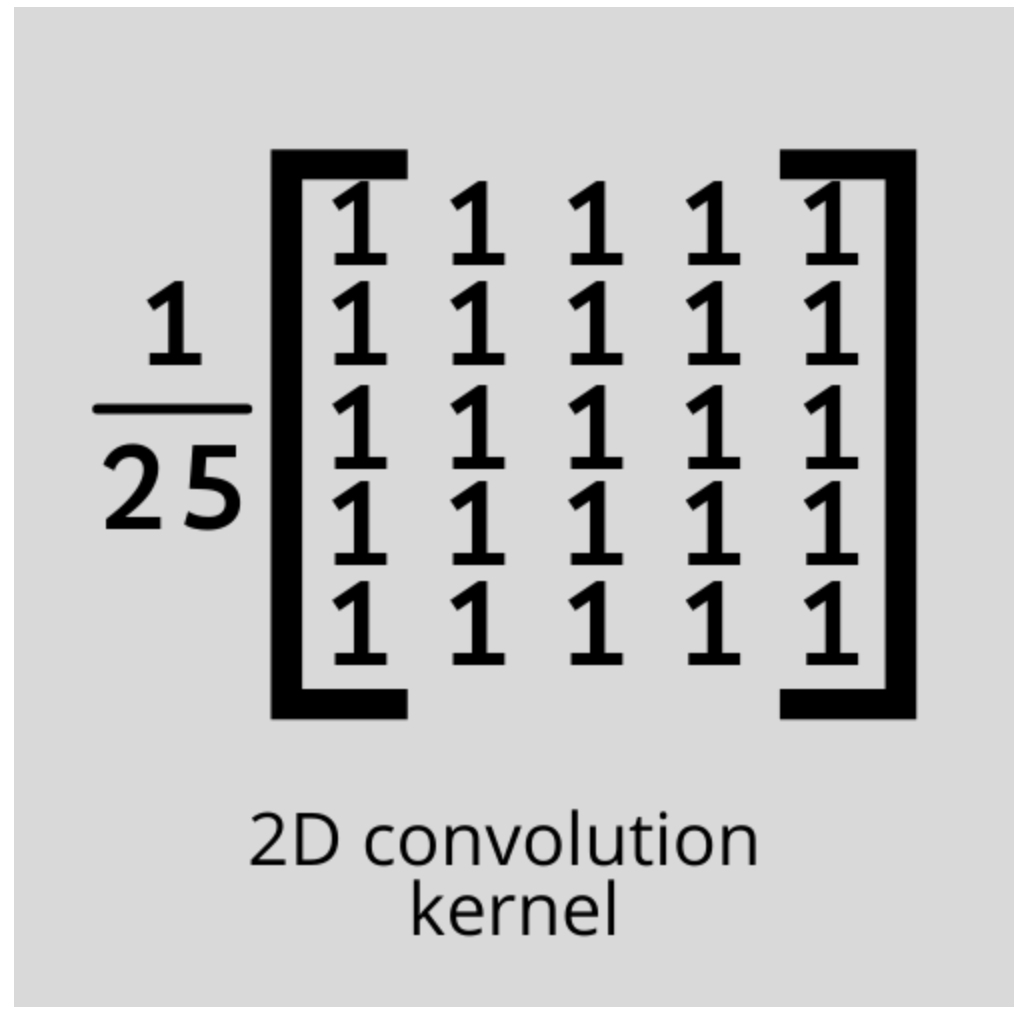
Image Citation: https://www.geeksforgeeks.org/python/python-opencv-smoothing-and-blurring/

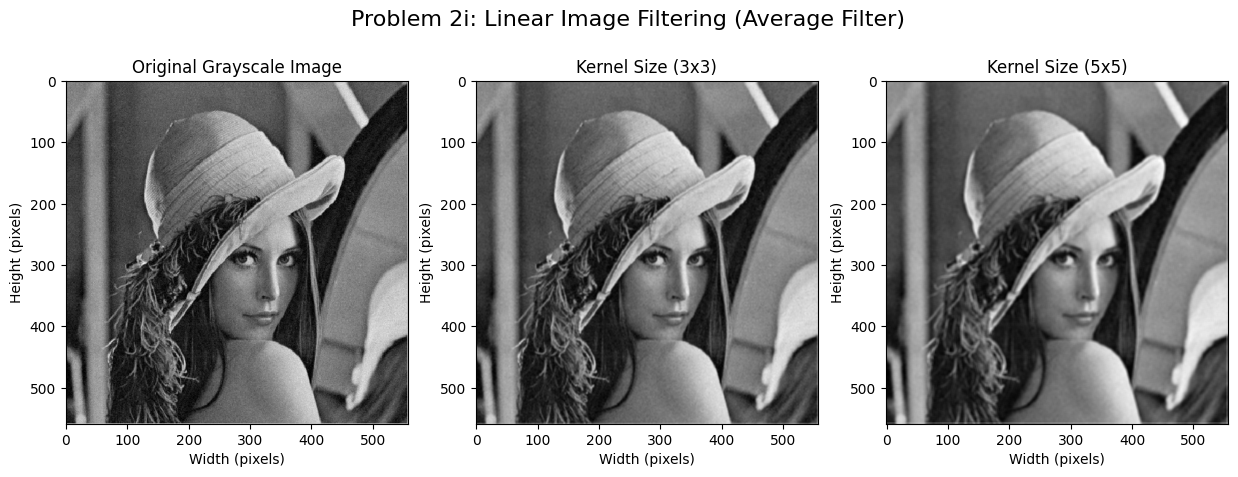

In [7]:
# Load image to apply Filters
grayscale_image = cv2.imread("a-Noisy-Lena-image-with-low-level-Gaussian-noise-variance-0001-mean-0-b-The.ppm(1).png", cv2.IMREAD_GRAYSCALE)

# Use existing Averaging filter function in cv2 to linearly filter the grayscale image
blurred_3 = cv2.blur(grayscale_image, (3, 3))
blurred_5 = cv2.blur(grayscale_image, (5, 5))

# Display results 
filter_results_i = [("Original Grayscale Image", grayscale_image),
           ("Kernel Size (3x3)", blurred_3),
           ("Kernel Size (5x5)", blurred_5)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (title, img) in enumerate(filter_results_i):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].set_xlabel("Width (pixels)")
    axes[i].set_ylabel("Height (pixels)")
    
plt.suptitle("Problem 2i: Linear Image Filtering (Average Filter)", fontsize=16)
plt.show()


ii. Gaussian Kernel (σ =1,2,3) Use (3σ +1)×(3σ +1) as size of Kernel  
So the kernel size is 4x4, 7x7, and 10x10 for σ =1,2,3 respectively.
Works by convolving over the image with the kernel in the following image.
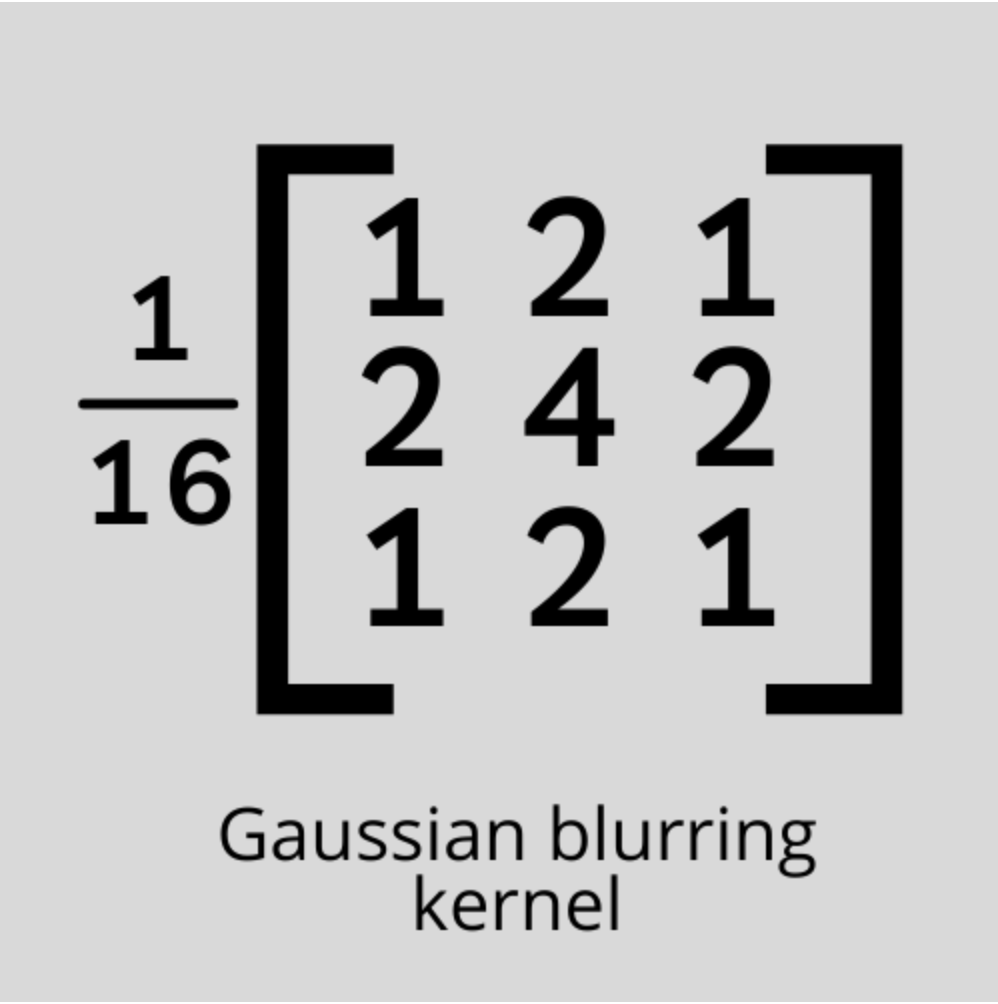
Image Citation: https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gae8bdcd9154ed5ca3cbc1766d960f45c1

I tried following the instructions to use kernel sizes based on the sigma of in the equation (3σ +1)×(3σ +1), where σ = 1,2, and 3. But it seems like the built-in function cv2.GaussianBlur() does not accept even kernel sizes.
So I used the next odd number for the kernel size. For example, for σ = 1, the kernel size is 4x4, but I used 5x5 instead and for σ = 3, the kernel size is 10x10, but I used 11x11 instead. 

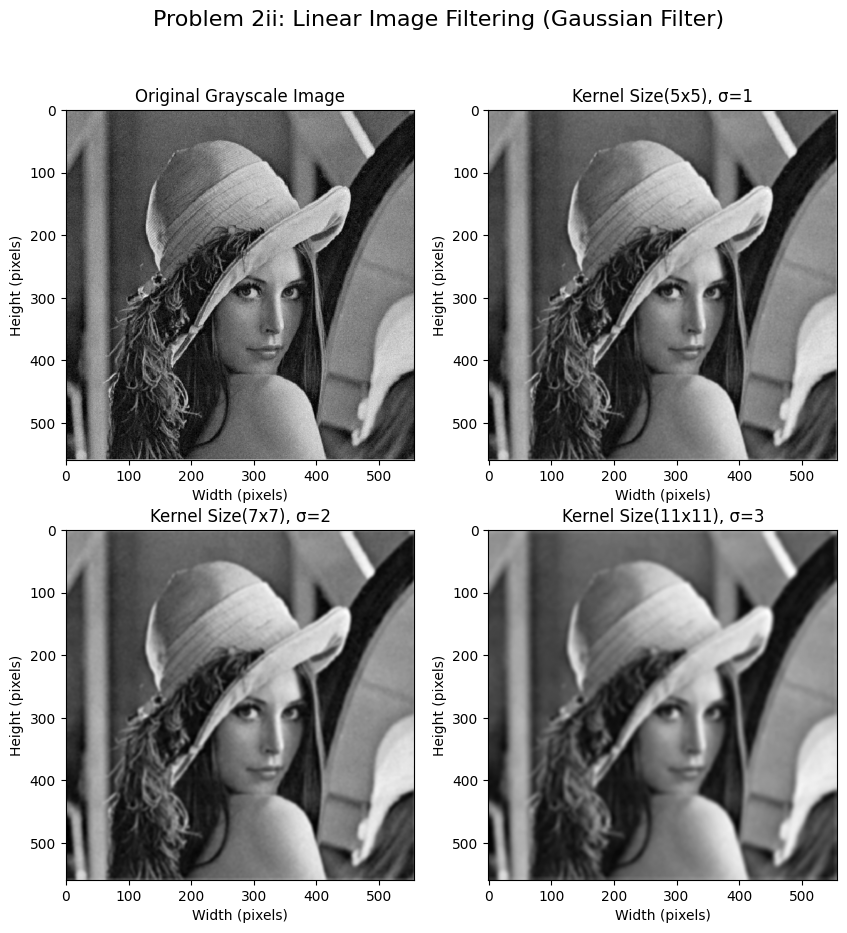

In [8]:
# Apply Gaussian Blur with different kernel sizes
gauss_1 = cv2.GaussianBlur(grayscale_image, (5, 5), 1)
gauss_2 = cv2.GaussianBlur(grayscale_image, (7, 7), 2)
gauss_3 = cv2.GaussianBlur(grayscale_image, (11, 11), 3)

# Display results
filter_results_ii = [("Original Grayscale Image", grayscale_image),
           ("Kernel Size(5x5), σ=1", gauss_1),
           ("Kernel Size(7x7), σ=2", gauss_2),
           ("Kernel Size(11x11), σ=3", gauss_3)]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, (title, img) in enumerate(filter_results_ii):
    axes[i // 2, i % 2].imshow(img, cmap='gray')
    axes[i // 2, i % 2].set_title(title)
    axes[i // 2, i % 2].set_xlabel("Width (pixels)")
    axes[i // 2, i % 2].set_ylabel("Height (pixels)")

plt.suptitle("Problem 2ii: Linear Image Filtering (Gaussian Filter)", fontsize=16)
plt.show()


iii. Roberts Edge Operators :
The Roberts Cross Operator performs a simple 2-D spatial gradient operation by using a pair of 2x2 convolution kernels. These kernels are applied to the image to highlight edges in the diagonal directions. The operator is defined as follows:

$$ G_x = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \quad G_y = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix} $$

The gradient magnitude is then computed as:

$$ G = \sqrt{G_x^2 + G_y^2} $$

This operator is particularly sensitive to edges that are oriented at 45 degrees to the pixel grid.

Summary of how the Operator works from: https://www.geeksforgeeks.org/python/python-opencv-roberts-edge-detection/

I followed implementation instructions found on: https://www.geeksforgeeks.org/python/python-opencv-roberts-edge-detection/


In [9]:
# Create Roberts Cross Operator kernels
roberts_cross_vert = np.array([[1, 0], [0, -1]])
roberts_cross_horz = np.array([[0, 1], [-1, 0]])

# Load image to apply Roberts Cross Operator
robcross_image = cv2.imread('pexels-jimmykphotos-32954778.jpg').astype('float32')  # Load your image here
robcross_grayimage = cv2.cvtColor(robcross_image, cv2.COLOR_BGR2GRAY)
robcross_grayimage/= 255.0  # Normalize to [0, 1] range

# Apply Roberts Cross Operator
vertical = ndimage.convolve(robcross_grayimage, roberts_cross_vert)
horizontal = ndimage.convolve(robcross_grayimage, roberts_cross_horz)

# Calculate the magnitude of the gradient
roberts = np.sqrt(np.square(vertical) + np.square(horizontal))
roberts*= 255.0 # Scale back to [0, 255] range


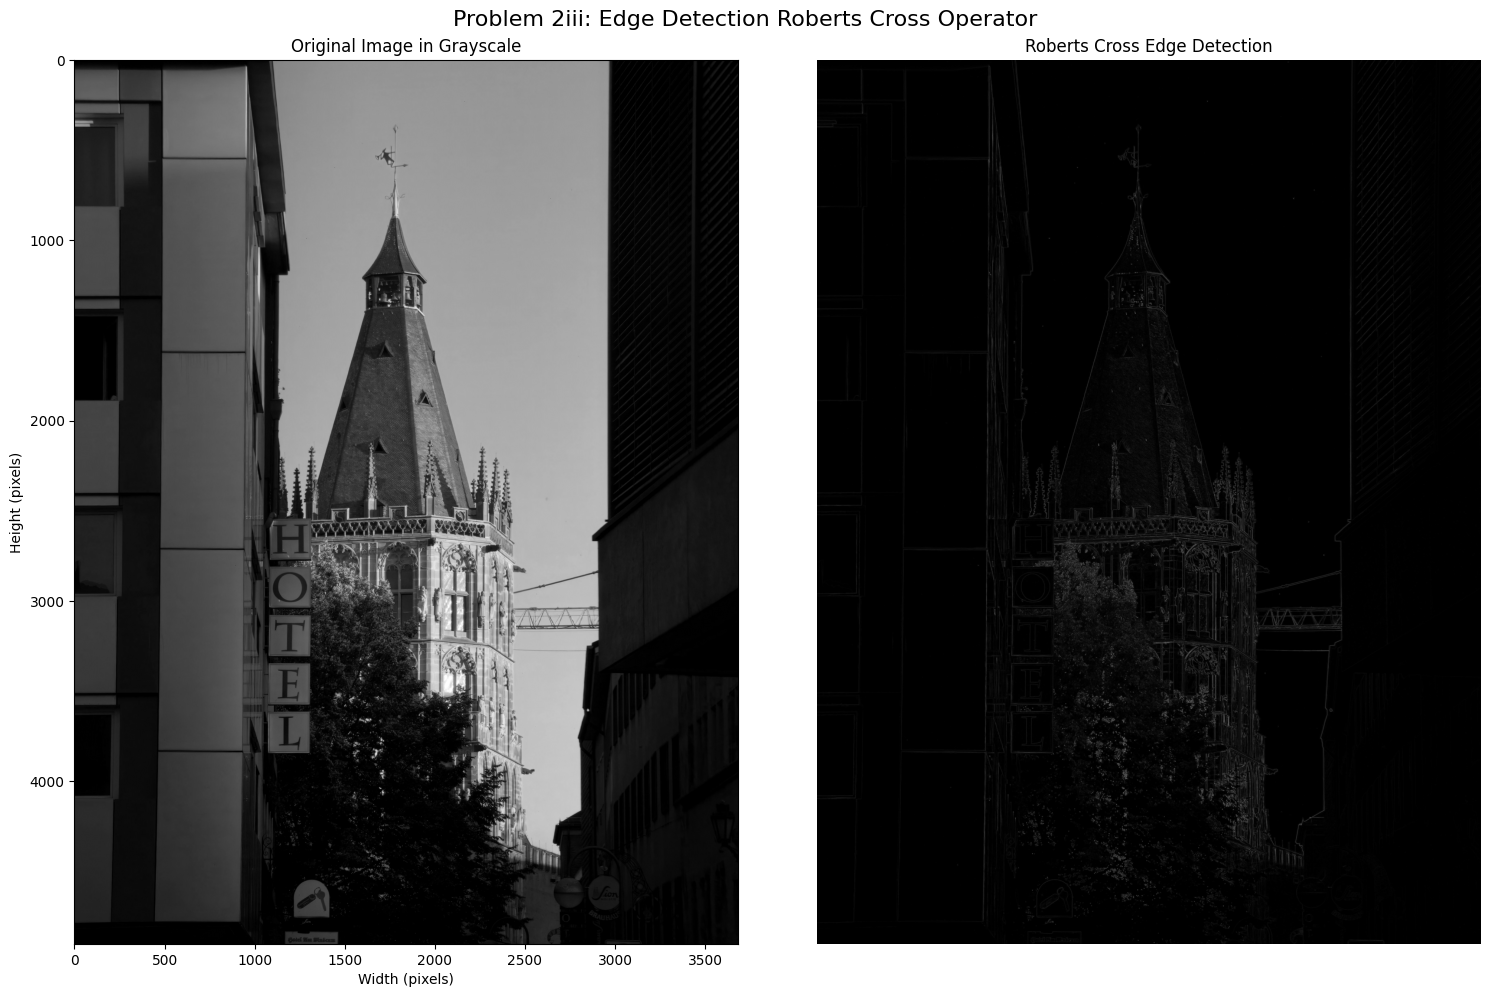

In [10]:
# Display results
results = [("Original Image in Grayscale", robcross_grayimage),
           ("Roberts Cross Edge Detection", roberts)]

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
for i, (title, img) in enumerate(results):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].set_xlabel("Width (pixels)")
    axes[i].set_ylabel("Height (pixels)")

plt.suptitle("Problem 2iii: Edge Detection Roberts Cross Operator", fontsize=16)
plt.tight_layout()
plt.axis('off')
plt.show()


iv. Sobel Edge Operators: Using built-in function

The Sobel operators are a joint Gaussian smoothing with a differentiation operation that makes it more resistant to noise.
The direction of the gradient (vertical or horizontal) can be specified. Kernel size can also be specified.


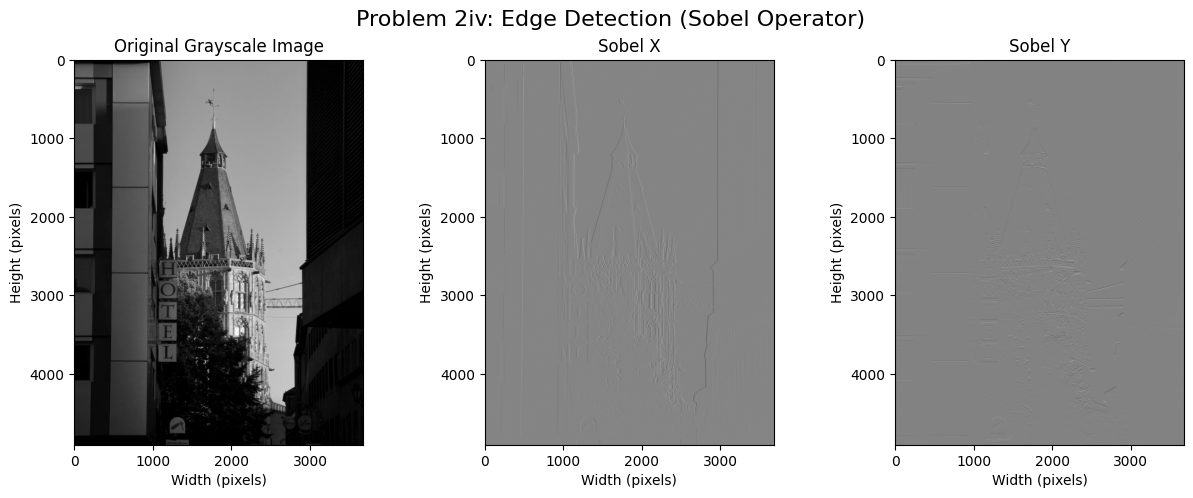

In [11]:
# The following code applies the Sobel operator to the grayscale image from the 
# Roberts Cross Operator section

sobel_x = cv2.Sobel(robcross_grayimage, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(robcross_grayimage, cv2.CV_64F, 0, 1, ksize=5)

# Display results 
sobel_results_iv = [("Original Grayscale Image", robcross_grayimage),
           ("Sobel X", sobel_x),
           ("Sobel Y", sobel_y)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (title, img) in enumerate(sobel_results_iv):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].set_xlabel("Width (pixels)")
    axes[i].set_ylabel("Height (pixels)")

plt.suptitle("Problem 2iv: Edge Detection (Sobel Operator)", fontsize=16)
plt.show()


v. Prewitt Edge Operators:  Used to detect vertical and horizontal edges in images. It is similar to the Sobel operator but uses a different kernel. The Prewitt operator is defined as follows:

$$ \text{Prewitt X Kernel:} \quad \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} $$ 
$$ \text{Prewitt Y Kernel:} \quad \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix} $$

An edge can be defined as a change in pixel intensity between neighboring pixels. This change is calculated using derivatives.

Explanation and steps for implementing prewitt edge detection from: 
https://www.geeksforgeeks.org/software-engineering/edge-detection-using-prewitt-scharr-and-sobel-operator/


In [12]:
# Initialize Prewitt Operator kernels
prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], 
                      [0, 0, 0], 
                      [1, 1, 1]])


# Use same grayscale image from the previous section
prewitt_grayimage = cv2.imread('pexels-jimmykphotos-32954778.jpg', cv2.IMREAD_GRAYSCALE).astype('float32')

# Apply Prewitt X and Y kernels
prewitt_ximg = cv2.filter2D(prewitt_grayimage, -1, prewitt_x)
prewitt_yimg = cv2.filter2D(prewitt_grayimage, -1, prewitt_y)

# Calculate the magnitude of the Prewitt operator which is the overall edge strength
prew = cv2.magnitude(prewitt_ximg.astype(np.float32), prewitt_yimg.astype(np.float32))


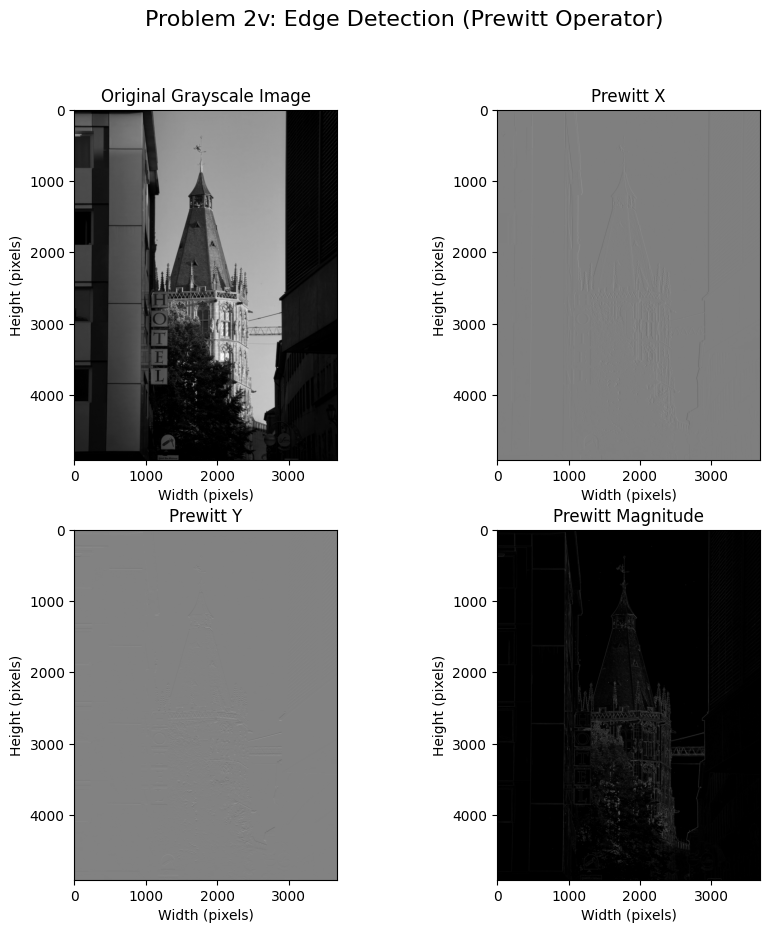

In [13]:
# Show results
prewitt_results_v = [("Original Grayscale Image", prewitt_grayimage),
           ("Prewitt X", prewitt_ximg),
           ("Prewitt Y", prewitt_yimg),
           ("Prewitt Magnitude", prew)]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, (title, img) in enumerate(prewitt_results_v):
    axes[i // 2, i % 2].imshow(img, cmap='gray')
    axes[i // 2, i % 2].set_title(title)
    axes[i // 2, i % 2].set_xlabel("Width (pixels)")
    axes[i // 2, i % 2].set_ylabel("Height (pixels)")

plt.suptitle("Problem 2v: Edge Detection (Prewitt Operator)", fontsize=16)
plt.show()

2. Write a function GaussianPyramids that produces n levels of gaussian pyramid for image I. 
Use built-in function cv2.pyrDown() to downsample the image.

In [14]:

def gaussian_pyramid(img, n):
    """Generates a Gaussian pyramid with n levels where each level is
    1/4 the size of the previous level."""
    pyramid = [img]
    for _ in range(n-1):
        img = cv2.pyrDown(img)
        pyramid.append(img)
    return pyramid


 
3. Write a function LaplacianPyramids that produces n levels of Laplacian pyramid of image I.  
 


In [15]:
def laplacian_pyramid(img, n):
    """Generates a Laplacian pyramid with n levels."""
    gaussian_pyr = gaussian_pyramid(img, n)
    laplacian_pyr = []
    for i in range(n-1):
        # Upsample the smaller image to the size of the current level
        upsampled = cv2.pyrUp(gaussian_pyr[i+1])
        # Compute the Laplacian
        laplacian = cv2.subtract(gaussian_pyr[i], upsampled)
        laplacian_pyr.append(laplacian)
    # Append the last level of the Gaussian pyramid
    laplacian_pyr.append(gaussian_pyr[-1])
    return laplacian_pyr

 
## Problem 3  (Ran out of time for this problem)
 
Camera Calibration with Harris Corner Detection 
Objective: 
The aim of this assignment is to use Harris Corner Detection to identify corner points from a checkerboard 
pattern  for  camera  calibration.  Students  will  extract  3D  and  2D  points,  and  then  calculate  the 
camera's intrinsic and extrinsic parameters by following the methodology outlined in Lecture 2 slides. 
 
 
Instructions: 
Step 1: Setup 
1.  Print or use a pre-existing checkerboard pattern with known square dimensions (e.g., 25mm x 25mm 3  per square). 



2.  Place the checkerboard in a room setting at different positions and orientations. Ensure the pattern is 
fully visible in each image. 



3.  Capture  at  least 5 images of  the  checkerboard  from  different  perspectives  using  a  smartphone  or 
camera. Make sure the camera remains fixed between shots. 
 
 
Step 2: Harris Corner Detection 
1.  Detect Corners: 
o Use the Harris Corner Detection algorithm to find corner points on the checkerboard in each 
captured image. 
o Highlight the detected corners on the image for visualization. 
o Refine  the  corner  points  using sub-pixel  corner  detection (e.g., cv2.cornerSubPix in 
OpenCV). 
2.  Select Corresponding Points: 
o Identify the corresponding 3D world points for each detected corner. Assume: 
§ The checkerboard lies on the z=0 plane. 
§ The top-left corner of the checkerboard is the origin (0,0,0). 
§ Each square's size is known (e.g., 25mm). 
o Pair the detected 2D image points (from Harris Corner Detection) with their respective 3D 
world points. 
 
Step 3: Camera Calibration 
1.  Intrinsic and Extrinsic Parameters: 
o Use  the Lecture  2  slides to  calculate  the  camera’s intrinsic  parameters (focal  length, 
principal point, and skew) and extrinsic parameters (rotation and translation matrices). 
o Perform these calculations programmatically using a library like OpenCV or manually in 
Python based on the formulas provided in the lecture. 
o Derive the intrinsic matrix K and the extrinsic parameters [R∣t] for each image. 
 
Step 4: Evaluate and Verify 
1.  Reprojection: 
o Reproject the 3D points onto the image plane using the calculated parameters. 
o Compare  the  reprojected  points  with  the  original  detected  2D  points  from  Harris  Corner 
Detection. 
2.  Reprojection Error: 
o Calculate the reprojection error to evaluate the accuracy of your calibration. 
 
 
Deliverables 
1.  Images and Detected Corners: 
o Include the original images with the Harris-detected corners clearly highlighted. Ensure the 
visualization is clear, using markers (e.g., circles, squares) to show the detected corners. 
2.  Camera Parameters: 
o Provide the calculated Intrinsic Parameters, including: 
o Provide the Extrinsic Parameters for each image: 
3.  Reprojection Error: 
o Report the reprojection error calculated during the calibration process. 
